In [111]:
import MENDER
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
adata_raw = sc.read_h5ad('Dataset2_osmFISH.h5ad')

In [113]:
adata_raw

AnnData object with n_obs × n_vars = 4839 × 33
    obsm: 'spatial'

In [114]:
adata_raw.var_names = [f"Gene_{i:d}" for i in range(adata_raw.n_vars)]
print(adata_raw.var_names)

Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5', 'Gene_6',
       'Gene_7', 'Gene_8', 'Gene_9', 'Gene_10', 'Gene_11', 'Gene_12',
       'Gene_13', 'Gene_14', 'Gene_15', 'Gene_16', 'Gene_17', 'Gene_18',
       'Gene_19', 'Gene_20', 'Gene_21', 'Gene_22', 'Gene_23', 'Gene_24',
       'Gene_25', 'Gene_26', 'Gene_27', 'Gene_28', 'Gene_29', 'Gene_30',
       'Gene_31', 'Gene_32'],
      dtype='object')


In [115]:
# input parameters of MENDER
scale = 6
radius = 150
n_domains = 11

adata = adata_raw.copy()


sc.pp.neighbors(adata)
sc.tl.leiden(adata,resolution=2,key_added='ct',random_state=666)
adata.obs['ct'] = adata.obs['ct'].astype('category')

msm = MENDER.MENDER_single(
    adata,
    ct_obs='ct',
    random_seed=666
)

msm.set_MENDER_para(
    n_scales=scale,
    nn_mode='radius',
    nn_para=radius,

)
msm.run_representation()
msm.run_clustering_normal(n_domains)

scale 0, median #cells per radius (r=150): 1.0
scale 1, median #cells per radius (r=150): 2.0
scale 2, median #cells per radius (r=150): 3.0
scale 3, median #cells per radius (r=150): 4.0
scale 4, median #cells per radius (r=150): 5.0
scale 5, median #cells per radius (r=150): 6.0
searching resolution to k=11
Res =  0.1 Num of clusters =  4
Res =  0.15000000000000002 Num of clusters =  6
Res changed to 0.15000000000000002
Res =  0.2 Num of clusters =  6
Res changed to 0.2
Res =  0.25 Num of clusters =  6
Res changed to 0.25
Res =  0.3 Num of clusters =  7
Res changed to 0.3
Res =  0.35 Num of clusters =  8
Res changed to 0.35
Res =  0.39999999999999997 Num of clusters =  8
Res changed to 0.39999999999999997
Res =  0.44999999999999996 Num of clusters =  9
Res changed to 0.44999999999999996
Res =  0.49999999999999994 Num of clusters =  9
Res changed to 0.49999999999999994
Res =  0.5499999999999999 Num of clusters =  10
Res changed to 0.5499999999999999
Res =  0.6 Num of clusters =  11
re

MENDER prediction


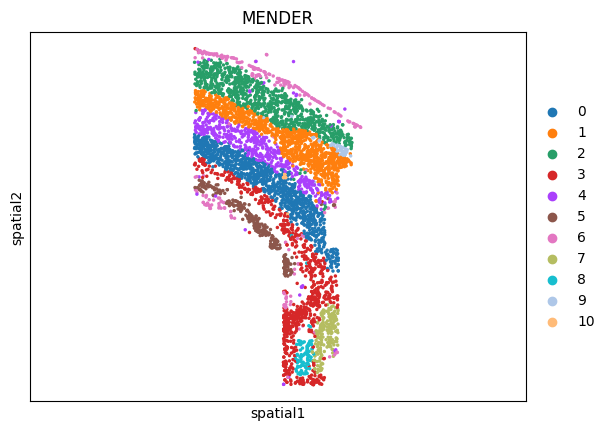

In [116]:
msm.output_cluster(obs='MENDER')
print('MENDER prediction')

In [117]:
msm.adata_MENDER.write_h5ad('osmFISH.h5ad')

In [118]:
adata_mender = sc.read_h5ad('osmFISH.h5ad')

In [119]:
adata_mender.obs

,ct,leiden,MENDER_leiden_k11,MENDER
cell_778,7,0,0,0
cell_1409,7,7,7,7
cell_3642,7,1,1,1
cell_1302,7,7,7,7
cell_1285,7,7,7,7
...,...,...,...,...
cell_6462,21,0,0,0
cell_260,21,2,2,2
cell_4446,21,3,3,3
cell_6431,2,0,0,0


In [120]:
clustering_result = adata_mender.obs[['MENDER']].copy()
clustering_result = clustering_result.reset_index(drop=True)
clustering_result['Id'] = clustering_result.index
clustering_result = clustering_result.rename(columns={'MENDER': 'Label'})

clustering_result = clustering_result[['Id', 'Label']]
clustering_result['Label'] = clustering_result['Label'].astype('int') + 1

print(clustering_result.head())

clustering_result.to_csv('clustering_result.csv', index=False)
print("Clustering results saved to 'clustering_result.csv'")


   Id  Label
0   0      1
1   1      8
2   2      2
3   3      8
4   4      8
Clustering results saved to 'clustering_result.csv'
